In [4]:
## Newton's method that allows for complex number input.
from sympy import *
import mpmath as mp

sym_x=Symbol("x")

def OI_Newton( f ):
    g = sym_x - f/diff(f,sym_x)
    return g

Sym_func = sym_x**3 - 1

Newt_Iterator = OI_Newton(Sym_func)

from mpmath import *

mp.dps = 20
mp.prec = mp.dps * 3.34
mp.pretty = True

oPoly = lambdify(sym_x, Sym_func, "mpmath")
NIt = lambdify(sym_x, Newt_Iterator, "mpmath")

## Here is an example of how Newton's method for z^3 - 1 converges to two different
## roots, depending on initial condition.

z = mpc(1.0, 0.5) ## mpc is the mpmath arbitrary-precision complex number floating-point type.
print("Initial condition: ", z)

for i in range(0,5):
    Z = z
    z = NIt(z)
    print(z)

print("Evaluating ", Sym_func, " at ", z, " gives: ", oPoly(z))
    
z = mpc(-1,0.5)
print("Initial condition: ", z)

for i in range(0,5):
    Z = z
    z = NIt(z)
    print(z)

print("Evaluating ", Sym_func, " at ", z, " gives: ", oPoly(z))

print("Both are very close to zero.")

Initial condition:  (1.0 + 0.5j)
(0.8266666666666666667 + 0.12j)
(1.009101293268602287 - 0.05582701123777840886j)
(0.9970913786920296195 - 0.001218678160774645252j)
(1.000006990428805843 + 7.128339109188268049e-6j)
(0.9999999999980538418 + 9.96593837081526383e-11j)
Evaluating  x**3 - 1  at  (0.9999999999980538418 + 9.96593837081526383e-11j)  gives:  (-5.838474709664136231e-12 + 2.989781511232941973e-10j)
Initial condition:  (-1.0 + 0.5j)
(-0.5066666666666666667 + 0.5466666666666666667j)
(-0.3832817777777777778 + 0.9627164444444444444j)
(-0.4810173976123450126 + 0.8551826783058666047j)
(-0.5004900329923770473 + 0.8660135028433907189j)
(-0.50000010998239533 + 0.8660251902444721468j)
Evaluating  x**3 - 1  at  (-0.50000010998239533 + 0.8660251902444721468j)  gives:  (-3.898195859218474063e-7 + 6.060524372235481895e-7j)
Both are very close to zero.


In [5]:
## to make a nice `pixel-style' image we will use the matplotlib imshow
## this routine takes a doublely-indexed arrayes of 3-element (RGB) lists, with 
## the last element a call dtype=float32. 

baseColour = [[1.0, 1.0, 0.2], [0.2, 1.0, 0.1], [1.0, 0.2, 1.0]]

def complexModulus(z):
    return sqrt(re(z * conj(z)))

## function returns a matplotlib imshow image array.
## Ix is a 2-element list of floats. The x-interval.
## Iy is a 2-element list of floats. The y-interval. 
## N is the number of subdivisions requested for Ix and Iy. 
## the array indicate the root Newton's method converges to. 
def rootPlot( Ix, Iy, N ):
    retval = []
    for i in range(N):
        buildline = []
        xc = Ix[0] + (float(i)/float(N))*(Ix[1]-Ix[0])
        for j in range(N):
            yc = Iy[0] + (float(j)/float(N))*(Iy[1]-Iy[0])
            ## Run Newton's Method. 
            z = mp.mpc( xc, yc )
            ## I'm going a little overboard here -- the routine is determined to iterate
            ## **as long as it takes** to find a root.  We know we're close to a root when
            ## z^3 - 1 has small modulus (distance from 0). 
            while (complexModulus(oPoly(z))>0.1):
                   z = NIt(z)
            if (complexModulus(z - mpc(1.0, 0.0))<0.1): buildline.append(baseColour[0])
            if (complexModulus(z - mpc(-0.5, 0.8660254))<0.1): buildline.append(baseColour[1])
            if (complexModulus(z - mpc(-0.5, -0.8660254))<0.1): buildline.append(baseColour[2])
        retval += [buildline]
    return retval        

imgarray = rootPlot( [-2.0, 2.0], [-2.0, 2.0], 801 )
##print imgarray

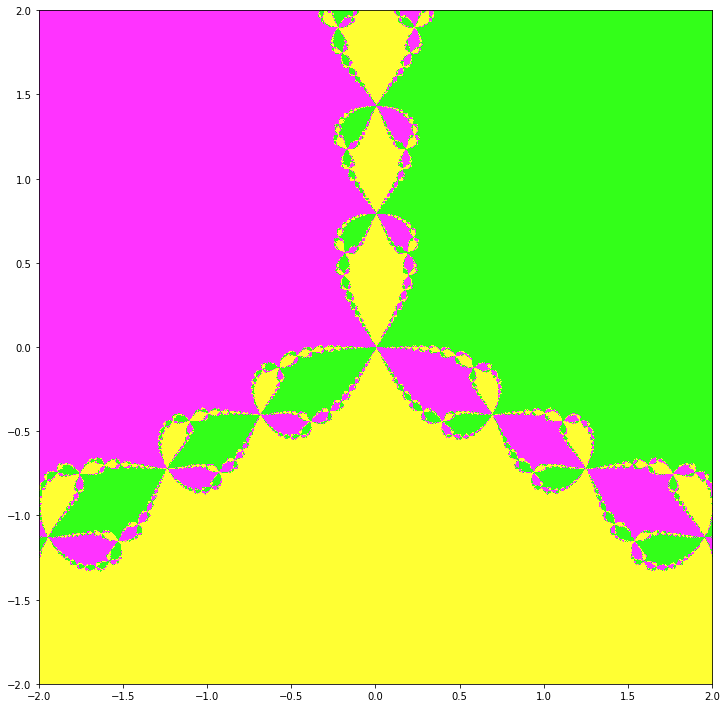

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

## figsize allows us to scale the image. imshow will interpolate
##  pixels to make a low or overly high-res image look okay in
##  the alloted space. 
fig, ax1 = plt.subplots(nrows=1, figsize=(10,10))
## extent allows us to define the axis of the image. 
imgplot = plt.imshow(imgarray, extent=[-2,2,-2,2], aspect=1.0)
plt.tight_layout()
plt.show()